# dcd_ch3_hw

## Homework for Chapter 3

In [2]:
from math import exp
from PSP_ThomasAlgorithm import ThomasBoundaryCondition
import PSP_grid as grid
import matplotlib.pyplot as plt
import numpy as np
from main_dcd import *

## Problem 1

If we begin at equ 3.7 we can plug in the area of a sphere, $4 \pi x^2$ as $A(x)$. Then, pulling the constant of $1/4 \pi$ out of the integral we get intermediate 2. Then, applying the inetegral, we can evaluate from $x_1$ to $x_2$, after reaching common denominators in intermediate three completing the denominator. Then by using the negetive exponent rule to adjust the $4 \pi * x_1 *x_2 $ we get the final equation

equ (3.7): $$\dfrac{D_g} {\displaystyle \int_{x_1}^{x_2} {\dfrac{\mathrm{d}x}{A(x)}}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{4 \pi x^2}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{4\pi} \displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x^2}} $$

int applied: $$\dfrac{D_g}{\dfrac{1}{4\pi} * -(x^{-2}+1)}$$

intermediate 3: $$ \dfrac{D_g} {\dfrac{1}{4\pi} * (\dfrac{x_2}{x_1*x_2} - \dfrac{x_1}{x_1*x_2})} $$

final result (eq. 3.10): $$\dfrac{4 * \pi * D_g * x_1 *x_2}{x_2-x_1} $$


For the second equation (eq 3.11) we must first apply $A(x)$ to be $2 \pi x$. then as last time we can remove the $1/2\pi$ from the integration to get int 2. then integrating with respect that the integral of $dx/x = \ln{|x|}$ we get int 3. by the law of logs we then get the final result



equ (3.7): $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{A(x)}} $$

intermediate 1: $$ \dfrac{D_g}{\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{2 \pi  x}} $$

intermediate 2: $$ \dfrac{D_g}{\dfrac{1}{2\pi}\displaystyle \int_{x_1}^{x_2} \dfrac{\mathrm{d}x}{x}} $$

intermediate 3: $$ \dfrac{D_g}{\dfrac{1}{2\pi}*(\ln{x_2}-\ln{x_1})}  $$

final result: $$ \dfrac{2*\pi*D_g}{\ln{(x_2/x_1)}} $$

## Problem #2

In [3]:
def dcd_main(waterContent,bulkDensity):
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    #bulkDensity = 1090.            #changed from 1200 to 1090 kg/m3           
    particleDensity = 2650.         
    #waterContent = 0.31            #changed from 0.2 to 0.31             
    respRate = -0.001               
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2 
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.001      #changed from 0.01 to 0.001
    volumeFrac_O2 = 0.21           #defined
    bg = 0.9                       #constant value ranging from 0.5-1.0 and depends on the value chosen for mg (can be seen in table 3.2.)
    mg = 2.3                       #constant value ranging from 1-2 depending on the shape of the soil particles (can be seen in table 3.2.)   
    
    porosity = 1. - bulkDensity / particleDensity
    gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /            #equation 3.15
                          (R * (temperature + 273.15))) 
    
 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)
    
    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14
    
    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2, 
                      dg_O2, respRate, totalDepth, n)
    
    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2
                           
    pco2 = 0.21 - po                                                          #partial pressure of CO2 assuming recipirocal relationship
      
    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(po[i], -z[i], 'ro', pco2[i], -z[i], 'go')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)  
    plt.xlabel('Concentration [g m$^{-3}$]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()



node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.207       0.003
  3      0.05      0.205       0.005
  4      0.08      0.203       0.007
  5      0.10      0.201       0.009
  6      0.12      0.199       0.011
  7      0.15      0.197       0.013
  8      0.17      0.196       0.014
  9      0.20      0.195       0.015
 10      0.22      0.194       0.016
 11      0.25      0.193       0.017
 12      0.27      0.192       0.018
 13      0.30      0.191       0.019
 14      0.33      0.191       0.019
 15      0.35      0.190       0.020
 16      0.38      0.190       0.020
 17      0.40      0.190       0.020
 18      0.43      0.190       0.020
 19      0.45      0.189       0.021
 20      0.48      0.189       0.021
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.35


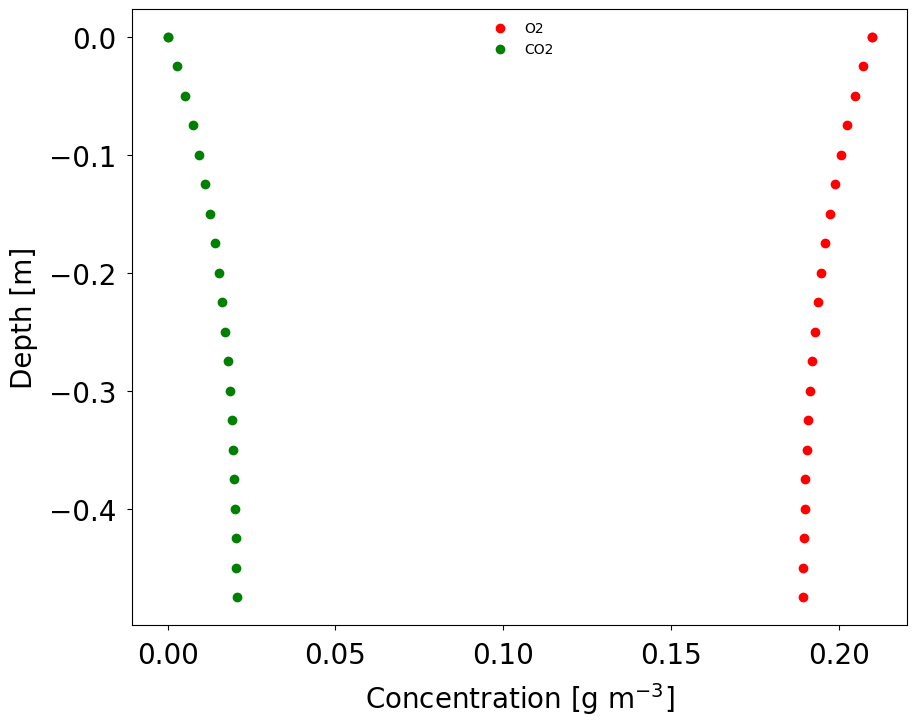

In [4]:
waterContent = 0.2
bulkDensity = 1200.
dcd_main(waterContent,bulkDensity)

the above is the original graph, after this will be an increase to the VWC, pb, K_O_2, and K_CO_2

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.191       0.019
  3      0.05      0.173       0.037
  4      0.08      0.158       0.052
  5      0.10      0.144       0.066
  6      0.12      0.131       0.079
  7      0.15      0.120       0.090
  8      0.17      0.110       0.100
  9      0.20      0.102       0.108
 10      0.22      0.094       0.116
 11      0.25      0.088       0.122
 12      0.27      0.082       0.128
 13      0.30      0.078       0.132
 14      0.33      0.074       0.136
 15      0.35      0.070       0.140
 16      0.38      0.068       0.142
 17      0.40      0.066       0.144
 18      0.43      0.064       0.146
 19      0.45      0.064       0.146
 20      0.48      0.063       0.147
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.15


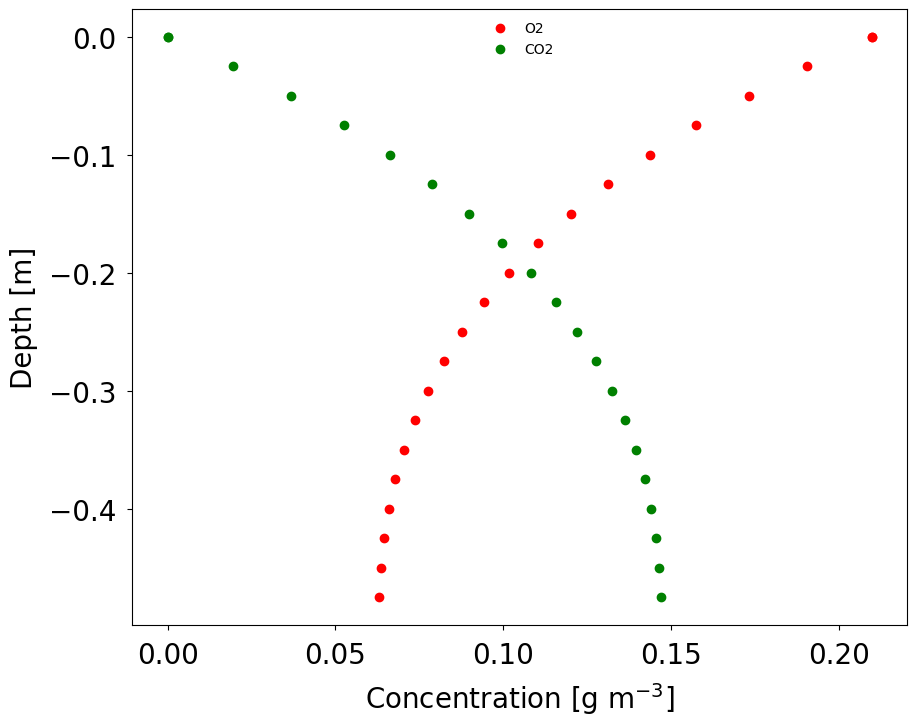

In [5]:
waterContent = 0.4
bulkDensity = 1200.
dcd_main(waterContent,bulkDensity)

node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.203       0.007
  3      0.05      0.197       0.013
  4      0.08      0.192       0.018
  5      0.10      0.187       0.023
  6      0.12      0.183       0.027
  7      0.15      0.179       0.031
  8      0.17      0.176       0.034
  9      0.20      0.173       0.037
 10      0.22      0.170       0.040
 11      0.25      0.168       0.042
 12      0.27      0.166       0.044
 13      0.30      0.164       0.046
 14      0.33      0.163       0.047
 15      0.35      0.162       0.048
 16      0.38      0.161       0.049
 17      0.40      0.160       0.050
 18      0.43      0.160       0.050
 19      0.45      0.159       0.051
 20      0.48      0.159       0.051
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.23


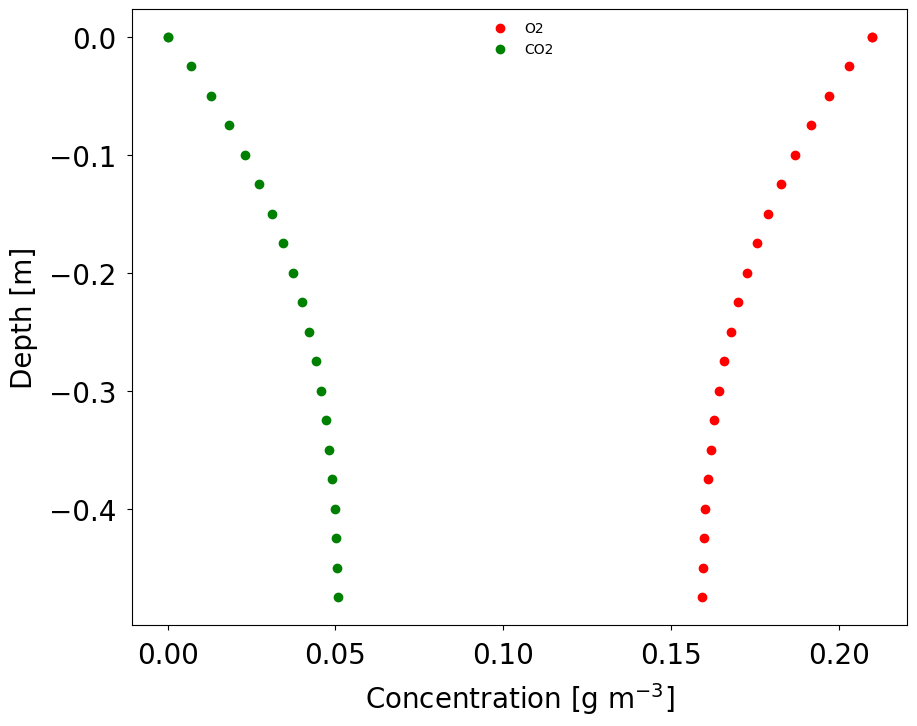

In [6]:
waterContent = 0.2
bulkDensity = 1500.
dcd_main(waterContent,bulkDensity)

side note: the code I used for this was done mostly by Mark and after figuring out how he got it to work I edited it to fit how I wanted. 

When observing the concentrations after increasing the water content we can see that the $O_2$ and $CO_2$ concentrations actually shift dominance around 20 cm deep. This model is essentially showing that as the water content of the soil is increased, possibly an effect of decreased air permiabilty caused by water films, that the concentration of $CO_2$ will go up as the depth increases. For similar reasons, with the blocked channels of airflow in mind, an increase in bulkdensity causes a decrease of $O_2$ with depth and increase of $CO_2$ with depth.


## Problem 3

In [18]:
def dcd_main_percents(gasPorosity):
    R = 8.3143                     
    n = 20                        
    totalDepth = 0.5               
    bulkDensity = 1200.            #kg/m3           
    particleDensity = 2650.         
    waterContent = 0.31                       
    respRate = -0.001               
    oxygenDiff = 1.77e-5           #changed from 1.39e-5 to 1.77e-5 for O2 
    temperature = 25.             
    atmPressure = 101.3           
    boundaryLayerCond = 0.01      
    volumeFrac_O2 = 0.21           #defined
    bg = 0.9                       #constant value ranging from 0.5-1.0 and depends on the value chosen for mg (can be seen in table 3.2.)
    mg = 2.3                       #constant value ranging from 1-2 depending on the shape of the soil particles (can be seen in table 3.2.)   
    
    porosity = 1. - bulkDensity / particleDensity
    #gasPorosity = porosity - waterContent


 # O2 concentration in air [g/m^3]
    boundaryConc_O2 = (volumeFrac_O2 * atmPressure * 1000. * 32. /            #equation 3.15
                          (R * (temperature + 273.15))) 
    
 # O2 binary diffusion coefficient [m2/s]
    binaryDiffCoeff_O2 = (oxygenDiff * (101.3 / atmPressure)                  #equation 3.13
                * ((temperature + 273.15) / 273.15)**1.75)
    
    dg_O2 = binaryDiffCoeff_O2 * bg * gasPorosity**mg                         #equation 3.14
    
    z, co = gasSolver(boundaryLayerCond, boundaryConc_O2, 
                      dg_O2, respRate, totalDepth, n)
    
    po = co * R * (temperature + 273.15) / (atmPressure * 1000. * 32.)        #partial pressure of O2
                           
    pco2 = 0.21 - po                                                          #partial pressure of CO2 assuming recipirocal relationship
      
    print ("node   depth [m]   Po2  Pco2")
    for i in range(n + 2):
        print ("%3d    %6.2f      %.3f       %.3f" %(i, z[i], po[i], pco2[i]))

    print ("gas-filled porosity (cm3/cm3)")
    print("%.2f" %(gasPorosity))
    
    # plot results
    fig = plt.figure(figsize=(10,8))
    for i in range(n+1):
        plt.plot(100*po[i], -z[i], 'ro', 100*pco2[i], -z[i], 'go')
    plt.legend(['O2', 'CO2'], loc="upper center", frameon = False)  
    plt.xlabel('Gas Percent [%]',fontsize=20,labelpad=8)
    plt.ylabel('Depth [m]',fontsize=20,labelpad=8)
    plt.tick_params(axis='both', which='major', labelsize=20,pad=8)
    plt.tick_params(axis='both', which='minor', labelsize=20,pad=8)
    plt.show()



node   depth [m]   Po2  Pco2
  0      0.00      0.210       0.000
  1      0.00      0.210       0.000
  2      0.03      0.204       0.006
  3      0.05      0.198       0.012
  4      0.08      0.193       0.017
  5      0.10      0.188       0.022
  6      0.12      0.184       0.026
  7      0.15      0.181       0.029
  8      0.17      0.178       0.032
  9      0.20      0.175       0.035
 10      0.22      0.172       0.038
 11      0.25      0.170       0.040
 12      0.27      0.169       0.041
 13      0.30      0.167       0.043
 14      0.33      0.166       0.044
 15      0.35      0.165       0.045
 16      0.38      0.164       0.046
 17      0.40      0.163       0.047
 18      0.43      0.163       0.047
 19      0.45      0.162       0.048
 20      0.48      0.162       0.048
 21      0.50      0.000       0.210
gas-filled porosity (cm3/cm3)
0.24


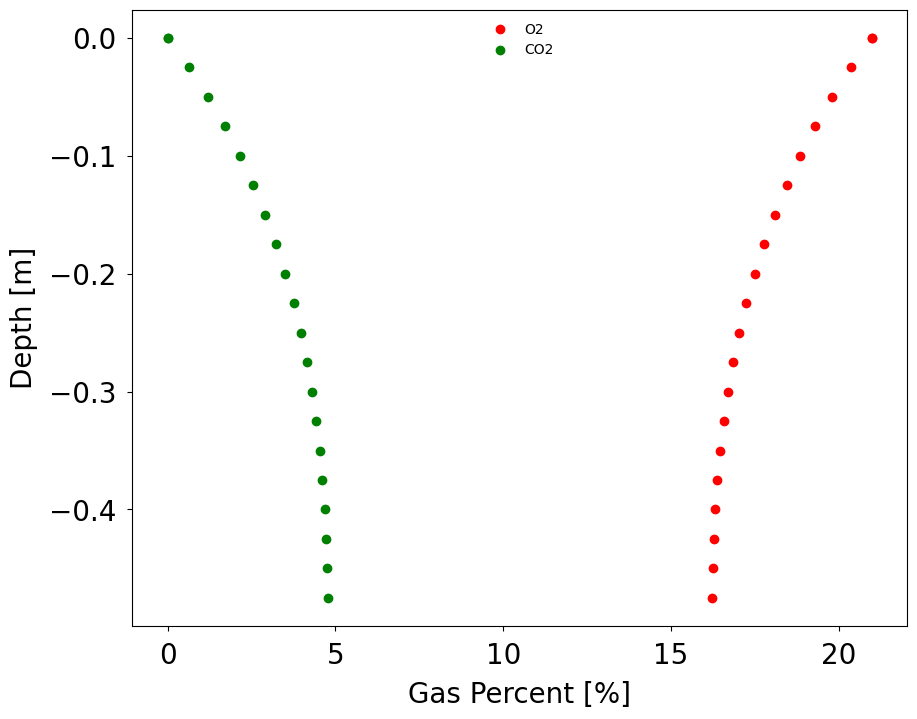

In [22]:
dcd_main_percents(0.24)

After test multiple values the parameters of the problem are met when gas filled porosity is $0.24 cm^3 cm^{-3}$ at its lowest. This is the case when the bulk density is $1200 kg/m^3$ and the water content is $0.31 cm^3 cm{-3}$